In [1]:
import cobra
from magine.plotting.venn_diagram_maker import create_venn3

ModuleNotFoundError: No module named 'magine'

In [2]:
from models import av, syn, rt
# av = cobra.io.read_sbml_model('../models/azotobacter_vinelandii_dj/iDT1278.xml')
# syn = cobra.io.read_sbml_model('../models/synechococcus_elongatus_pcc_7942/iJB785.xml')
# rt = cobra.io.read_sbml_model('../models/rhodosporidium_toruloides_ifo_08804/Rt_IFO0880.xml')

ModuleNotFoundError: No module named 'models'

In [3]:
# compare all metabolites across the three models
av_m = [i.id for i in av.metabolites]
syn_m = [i.id for i in syn.metabolites]
rt_m = [i.id for i in rt.metabolites]
create_venn3(av_m, syn_m, rt_m, 'AV', 'SYN', 'RT');

NameError: name 'av' is not defined

We noticed that AV had no overlap with metabolites. The source was the use of '_u' cocompartment in the model.

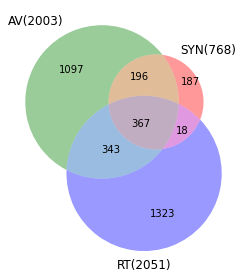

In [79]:
av_all = [i.id.rstrip('_u') for i in av.metabolites]
syn_all = [i.id for i in syn.metabolites]
rt_all = [i.id for i in rt.metabolites]
create_venn3(av_all, syn_all, rt_all, 'AV', 'SYN', 'RT');

We are interesting in metabolites that are imported/exported between the organisms.

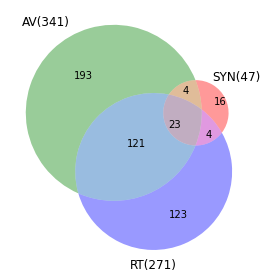

In [21]:
# comparing IDs
# compartment _e == extra_cellular
av_m = [i.id.rstrip('_u') for i in av.metabolites 
        if i.id.endswith('e_u')]
syn_m = [i.id for i in syn.metabolites if i.compartment == 'e']
rt_m = [i.id for i in rt.metabolites if i.compartment == 'e']
create_venn3(av_m, syn_m, rt_m, 'AV', 'SYN', 'RT');

In [71]:
for i in set(syn_m).difference(av_m):
    print(i)

photon410_e
photon550_e
photon450_e
photon490_e
leu__L_e
colipacy_e
photon470_e
photon630_e
photon690_e
photon650_e
photon610_e
photon530_e
photon570_e
photon590_e
photon670_e
photon510_e
arg__L_e
photon430_e
hco3_e
ptrc_e


In [70]:
[i for i in syn_m if 'hist' in i]

[]

In [68]:
unique_to_rt = set(rt_m).difference(syn_m).difference(av_m)

unique_to_syn = set(syn_m).difference(rt_m).difference(av_m)

unique_to_av = set(av_m).difference(rt_m).difference(syn_m)

In [24]:
for i in [unique_to_av, unique_to_rt, unique_to_syn]:
    print(len(i))

193
123
16


In [32]:
for i in unique_to_syn:
    print(i)

photon650_e
photon550_e
photon410_e
photon610_e
photon530_e
photon450_e
photon570_e
photon590_e
photon490_e
photon670_e
photon510_e
colipacy_e
photon470_e
photon430_e
photon630_e
photon690_e


### Find metabolites that 'could' be missing from models

In [ ]:
def check_metab_in_org(to_inspect, organism_background):
    background_core = [i.rsplit('_', 1)[0] for i in organism_background]
    found_in_org = set()
    for met in to_inspect:
        met_core = met.rsplit('_', 1)[0]
        if met_core in background_core:
            found_in_org.add(met_core)
    return found_in_org

In [80]:
check_metab_in_org(set(syn_m).difference(av_m), av_all)

{'arg__L', 'hco3', 'leu__L', 'ptrc'}

In [83]:
check_metab_in_org(set(av_m).difference(rt_m), rt_all)

{'2dglc',
 '34dhpac',
 '3hcinnm',
 '3hpp',
 '3hpppn',
 '4hoxpacd',
 '4hphac',
 'acald',
 'acgam1p',
 'acon_C',
 'acser',
 'ascb__L',
 'crn',
 'cyan',
 'cynt',
 'damp',
 'dcmp',
 'dcyt',
 'dgmp',
 'dgsn',
 'dimp',
 'dopa',
 'dump',
 'duri',
 'etoh',
 'fad',
 'fald',
 'g3pg',
 'g3ps',
 'gal1p',
 'gbbtn',
 'gdp',
 'glyald',
 'gthox',
 'gtp',
 'h2s',
 'hxan',
 'imp',
 'indole',
 'lipoate',
 'malthx',
 'maltpt',
 'maltttr',
 'mmet',
 'mobd',
 'nmn',
 'o2s',
 'octa',
 'orot',
 'pacald',
 'pheme',
 'phenol',
 'ppal',
 'progly',
 'psuri',
 'pydam',
 'pydx',
 'r5p',
 'sel',
 'skm',
 'tcynt',
 'ttdcea',
 'tungs',
 'uacgam',
 'udcpp',
 'udpacgal',
 'udpg',
 'udpgal',
 'udpglcur',
 'xmp',
 'xylu__L'}

In [82]:
check_metab_in_org(set(syn_m).difference(rt_m), rt_all)

{'cynt', 'mobd'}

In [65]:
check_metab_in_org(set(syn_m).difference(rt_m), rt_m)

set()

In [66]:
check_metab_in_org(set(rt_m).difference(syn_m), syn_m)

set()

In [50]:
check_metab_in_org(unique_to_syn, av_m)

set()

In [51]:
check_metab_in_org(unique_to_syn, rt_m)

set()

In [52]:
check_metab_in_org(unique_to_rt, av_m)

set()

In [53]:
check_metab_in_org(unique_to_av, rt_m)

set()

### Explore code that could be useful below

In [29]:
for r in rt.reactions:
    if 'Lcyst_e' in set(m.id for m in r.metabolites):
        print(r)

EX_Lcyst_e: Lcyst_e --> 
LCYSTt: Lcyst_e + cl_e + 2.0 na1_e <=> Lcyst_c + cl_c + 2.0 na1_c


In [30]:
for r in av.reactions:
    if 'leu__L_c_u' in set(m.id for m in r.metabolites):
        print(r)

LEUTAi: 4mop_c_u + glu__L_c_u --> akg_c_u + leu__L_c_u
LEUabcpp: atp_c_u + h2o_c_u + leu__L_p_u --> adp_c_u + h_c_u + leu__L_c_u + pi_c_u
LEUt2rpp: h_p_u + leu__L_p_u --> h_c_u + leu__L_c_u
BIOMASS_Av_DJ_core: 0.000223 10fthf_c_u + 2.6e-05 2fe2s_c_u + 0.000223 2ohph_c_u + 0.00026 4fe4s_c_u + 0.583020414344392 ala__L_c_u + 0.000223 amet_c_u + 0.4009934072884 arg__L_c_u + 0.126569944053473 asn__L_c_u + 0.267095137584612 asp__L_c_u + 75.55223 atp_c_u + 2e-06 btn_c_u + 0.005205 ca2_c_u + 0.005205 cl_c_u + 0.000576 coa_c_u + 2.5e-05 cobalt2_c_u + 0.133508 ctp_c_u + 0.000709 cu2_c_u + 0.0524198607691142 cys__L_c_u + 0.026166 datp_c_u + 0.027017 dctp_c_u + 0.027017 dgtp_c_u + 0.026166 dttp_c_u + 0.000223 fad_c_u + 0.006715 fe2_c_u + 0.007808 fe3_c_u + 0.194867292315076 gln__L_c_u + 0.31452909011218 glu__L_c_u + 0.429800509517426 gly_c_u + 0.215096 gtp_c_u + 70.028756 h2o_c_u + 0.116750318531968 his__L_c_u + 0.219621483067065 ile__L_c_u + 0.195193 k_c_u + 0.019456 kdo2lipid4_e_u + 0.6135247766

In [31]:
for r in rt.metabolites.Lcyst_e.reactions:
    print(r)

LCYSTt: Lcyst_e + cl_e + 2.0 na1_e <=> Lcyst_c + cl_c + 2.0 na1_c
EX_Lcyst_e: Lcyst_e --> 


In [32]:
vars(av.metabolites[0])

{'_id': '2pg_c_u',
 'name': 'D-Glycerate 2-phosphate',
 'notes': {},
 '_annotation': {'sbo': 'SBO:0000240'},
 '_model': <Model COBRAModel at 0x2031f945b08>,
 '_reaction': {<Reaction ENO at 0x20329c54588>,
  <Reaction GLYCK2 at 0x20329eee688>,
  <Reaction PGM at 0x2032a817f88>},
 'formula': 'C3H4O7P',
 'compartment': 'u',
 'charge': 0,
 '_bound': 0.0}